In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold

## DATA INPUT

In [5]:
"""
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
X_train = train_data.iloc[:,1:78]
y_train = train_data["Y"]
X_test = test_data.iloc[:,1:78]
y_test = test_data["Y"]
X_train.describe()
"""
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("y_test.csv")
X_train.drop(columns="Unnamed: 0", inplace = True)
X_test.drop(columns="Unnamed: 0", inplace = True)
y_train = Y_train["Y"]
y_test = Y_test["Y"]
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)
kf = KFold(n_splits = 5)
print(kf.get_n_splits(X))

5


## Logistic Regression

In [112]:
penaltys = ['l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)
 
lr_penalty= LogisticRegression(max_iter = 5000)
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='roc_auc')
grid.fit(X_train,y_train)
 
grid.cv_results_
 
print(grid.best_score_)
print(grid.best_params_)

0.7712097475014208
{'C': 0.1, 'penalty': 'l2'}


0
0.9752487562189055
(array([0.97606284, 0.63157895]), array([0.99910669, 0.05882353]), array([0.98745034, 0.10762332]), array([15672,   408]))
0.7764198232891931
1
0.9759950248756218
(array([0.97687465, 0.59459459]), array([0.99904379, 0.05597964]), array([0.98783486, 0.10232558]), array([15687,   393]))
0.7692955269521076
2
0.973257043348467
(array([0.97370225, 0.75      ]), array([0.99948826, 0.05381166]), array([0.98642677, 0.10041841]), array([15633,   446]))
0.7683456204952213
3
0.9741277442627029
(array([0.9751793 , 0.59090909]), array([0.99885021, 0.06132075]), array([0.98687283, 0.11111111]), array([15655,   424]))
0.776632789572323
4
0.9726351141240127
(array([0.97339232, 0.58064516]), array([0.99916848, 0.04044944]), array([0.98611199, 0.07563025]), array([15634,   445]))
0.7742459893663047


<Figure size 3600x2400 with 0 Axes>

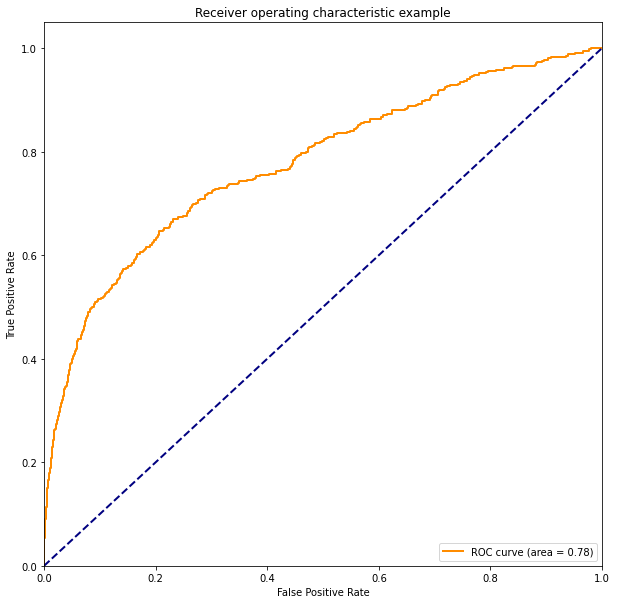

<Figure size 3600x2400 with 0 Axes>

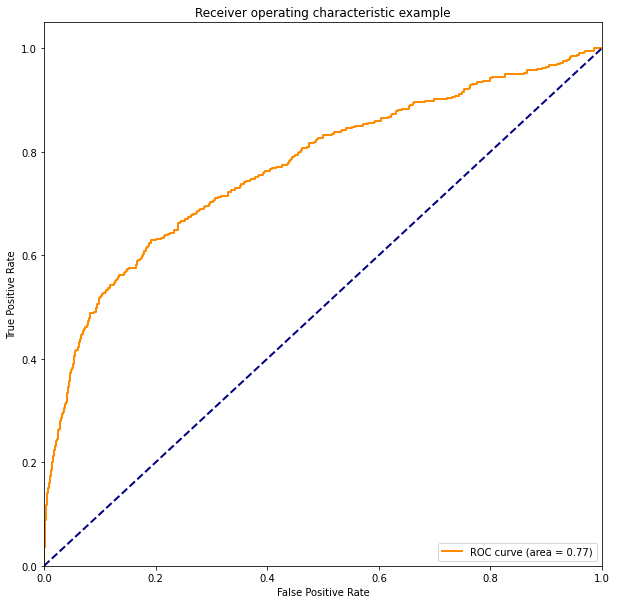

<Figure size 3600x2400 with 0 Axes>

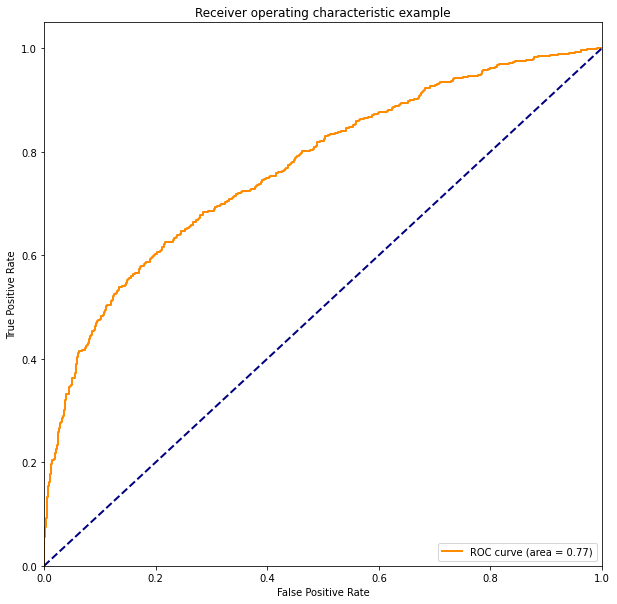

<Figure size 3600x2400 with 0 Axes>

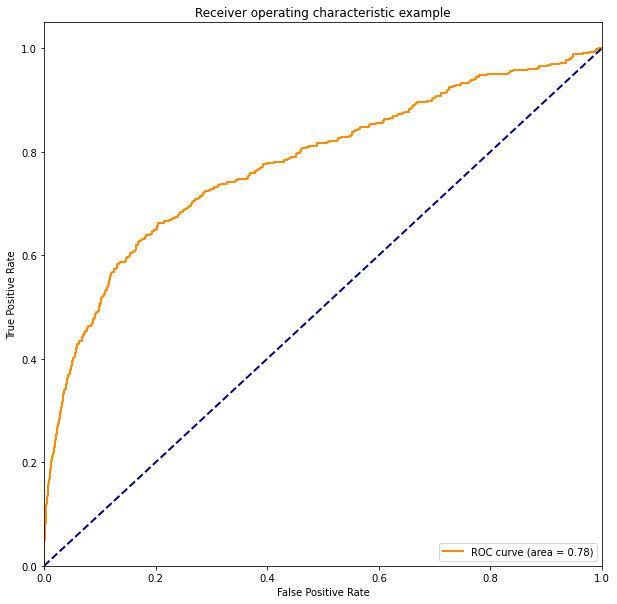

<Figure size 3600x2400 with 0 Axes>

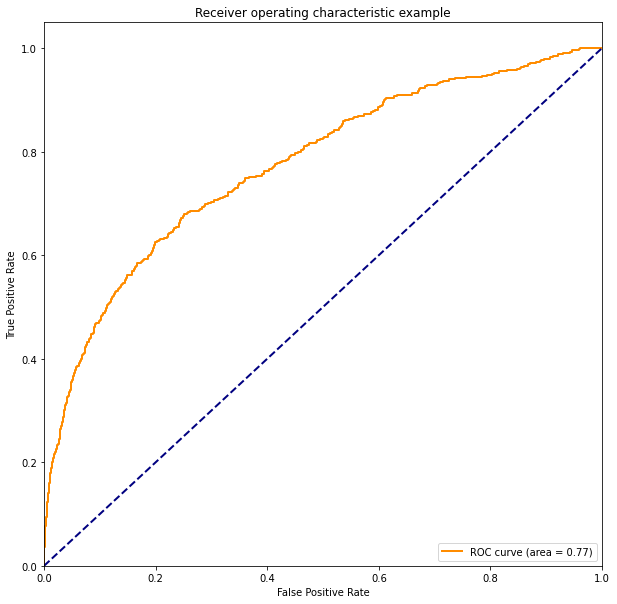

In [10]:
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    lr = LogisticRegression(random_state = 0, max_iter = 5000, C = 0.1, penalty = 'l2')
    lr.fit(X_train, y_train)
    lr_prob = lr.fit(X_train, y_train).decision_function(X_test)
    lr_pred = lr.predict(X_test)
    print(k)
    print(accuracy_score(y_test, lr_pred))
    print(precision_recall_fscore_support(y_test, lr_pred, average=None))
    print(roc_auc_score(y_test, lr_prob))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, lr_prob) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [134]:
cf_logistic = confusion_matrix(y_test, lr_pred)
print(cf_logistic)
print(accuracy_score(y_test, lr_pred))
print(precision_recall_fscore_support(y_test, lr_pred, average=None))

[[7805    5]
 [ 222    8]]
0.9717661691542289
(array([0.97234334, 0.61538462]), array([0.9993598 , 0.03478261]), array([0.98566648, 0.06584362]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

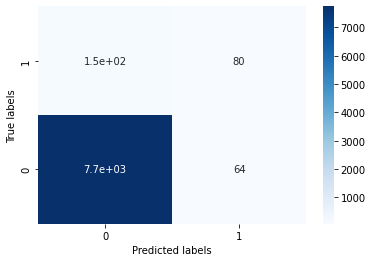

In [135]:
sns.heatmap(cf_dt, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.7825480153649166


<Figure size 3600x2400 with 0 Axes>

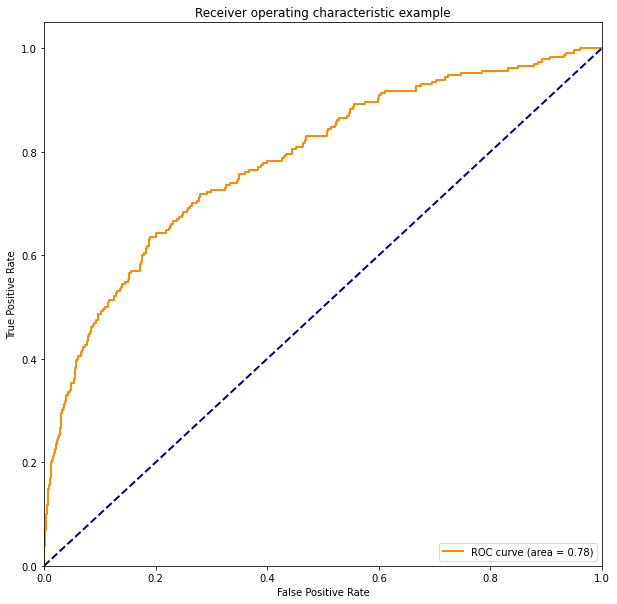

In [137]:
print(roc_auc_score(y_test, lr_prob))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, lr_prob) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## KNN

In [255]:
n_neighbors = [2,3,4,5,6,7,8,9,10]
p = [1,2]
weights = ["uniform", "distance"]
param = dict(n_neighbors = n_neighbors, p = p, weights = weights)
knn_opt = KNeighborsClassifier(n_neighbors = 4, weights = "distance", p = 1)
knn_gc = GridSearchCV(knn_opt, param_grid = param, cv = 5, scoring = 'roc_auc', n_jobs = -1 )
knn_gc.fit(X_train,y_train)
print(-knn_gc.best_score_)
print(knn_gc.best_params_)

-0.7901805385619032
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


0
0.9799751243781094
(array([0.98173487, 0.79054054]), array([0.99802195, 0.28676471]), array([0.98981142, 0.42086331]), array([15672,   408]))
0.7984112417299741
1
0.9810323383084577
(array([0.98189223, 0.86666667]), array([0.99898005, 0.26463104]), array([0.99036244, 0.40545809]), array([15687,   393]))
0.7844743812278071
2
0.9783568629889918
(array([0.97930386, 0.86567164]), array([0.99884859, 0.26008969]), array([0.98897967, 0.4       ]), array([15633,   446]))
0.7999168999463308
3
0.9791031780583369
(array([0.98030978, 0.83333333]), array([0.9985947 , 0.25943396]), array([0.98936776, 0.39568345]), array([15655,   424]))
0.7899639484642318
4
0.9779215125318739
(array([0.97863542, 0.88135593]), array([0.99910452, 0.23370787]), array([0.98876404, 0.36944938]), array([15634,   445]))
0.7731867882302043


<Figure size 3600x2400 with 0 Axes>

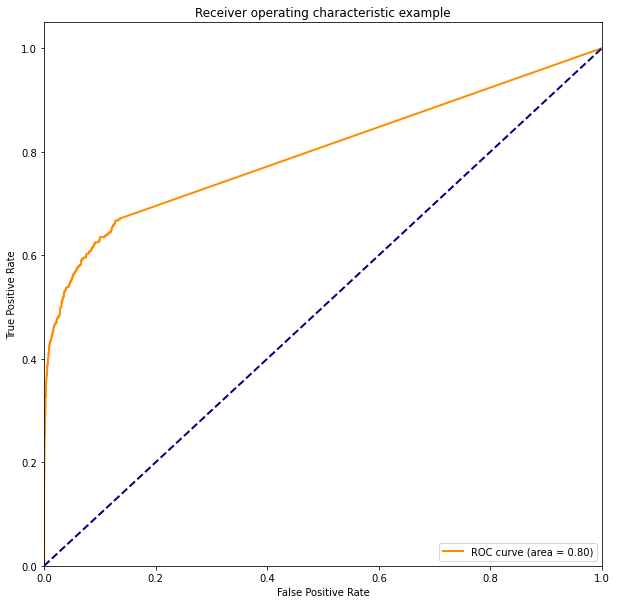

<Figure size 3600x2400 with 0 Axes>

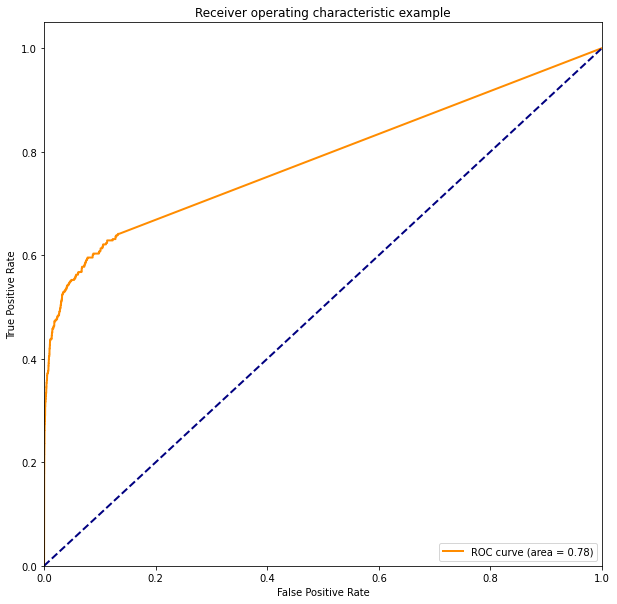

<Figure size 3600x2400 with 0 Axes>

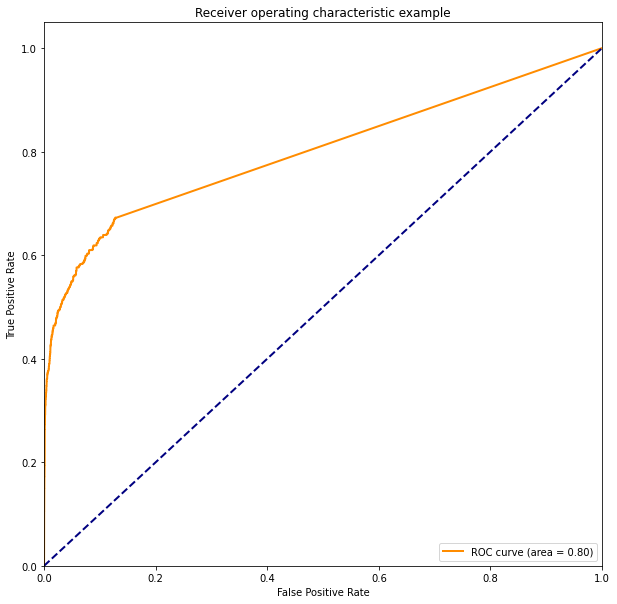

<Figure size 3600x2400 with 0 Axes>

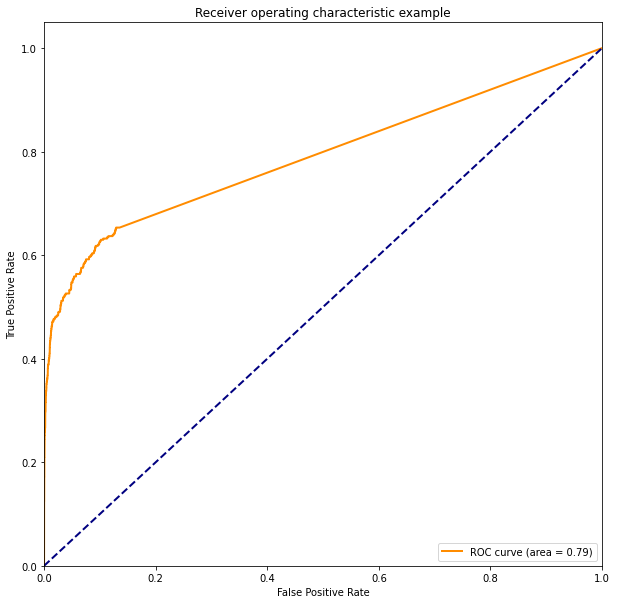

<Figure size 3600x2400 with 0 Axes>

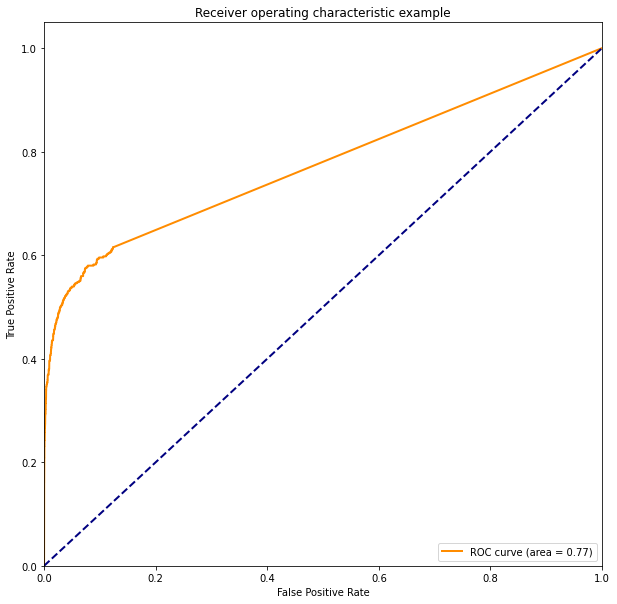

In [14]:
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    knn = KNeighborsClassifier(n_neighbors=10, weights="distance", p=1)
    knn.fit(X_train, y_train)
    knn_prob = knn.predict_proba(X_test)
    knn_pred = knn.predict(X_test)
    cf_knn = confusion_matrix(y_test, knn_pred)
    print(k)
    print(accuracy_score(y_test, knn_pred))
    print(precision_recall_fscore_support(y_test, knn_pred, average=None))
    print(roc_auc_score(y_test, knn_prob[:,1]))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, knn_prob[:,1]) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [257]:
cf_knn = confusion_matrix(y_test, knn_pred)
print(cf_knn)
print(accuracy_score(y_test, knn_pred))
print(precision_recall_fscore_support(y_test, knn_pred, average=None))

[[7804    6]
 [ 173   57]]
0.9777363184079602
(array([0.97831265, 0.9047619 ]), array([0.99923175, 0.24782609]), array([0.98866156, 0.3890785 ]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

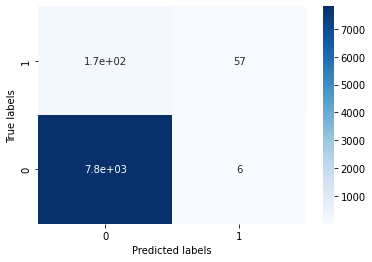

In [258]:
sns.heatmap(cf_knn, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.7704055558648332


<Figure size 3600x2400 with 0 Axes>

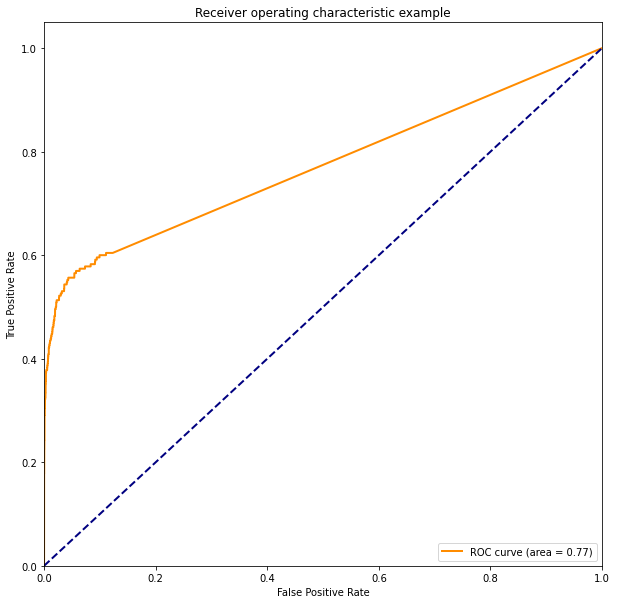

In [259]:
print(roc_auc_score(y_test, knn_prob[:,1]))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, knn_prob[:,1]) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## SVM

0
0.9782338308457711
(array([0.97827444, 0.96774194]), array([0.99987238, 0.14705882]), array([0.98895551, 0.25531915]), array([15672,   408]))
0.7399116008067341
1
0.9786069651741294
(array([0.97860129, 0.98039216]), array([0.99993625, 0.12722646]), array([0.98915374, 0.22522523]), array([15687,   393]))
0.7583628264826341
2
0.9753716027116114
(array([0.97565087, 0.90322581]), array([0.9996162 , 0.12556054]), array([0.98748815, 0.22047244]), array([15633,   446]))
0.7801383987362596
3
0.9768020399278562
(array([0.97708541, 0.9047619 ]), array([0.99961674, 0.13443396]), array([0.98822266, 0.23408624]), array([15655,   424]))
0.7666144398980372
4
0.9756203744013932
(array([0.97583666, 0.92063492]), array([0.99968018, 0.13033708]), array([0.98761453, 0.22834646]), array([15634,   445]))
0.7702704994732024


<Figure size 3600x2400 with 0 Axes>

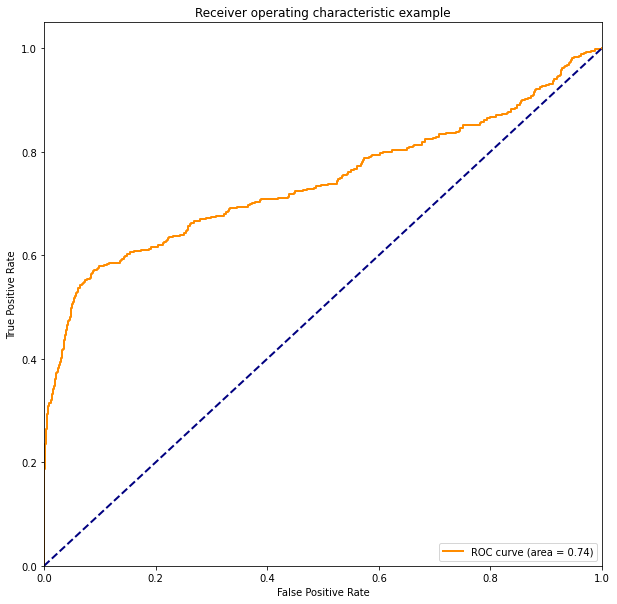

<Figure size 3600x2400 with 0 Axes>

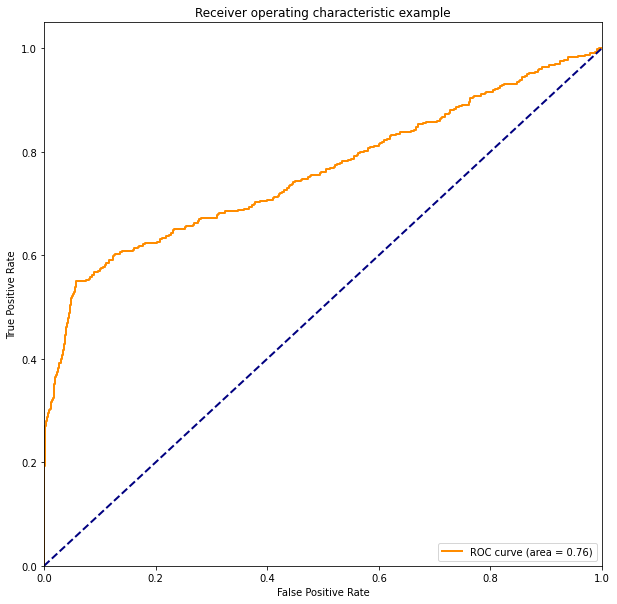

<Figure size 3600x2400 with 0 Axes>

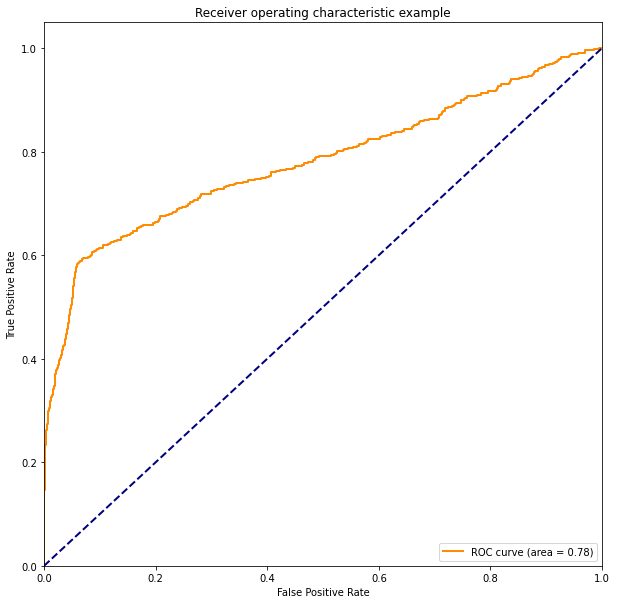

<Figure size 3600x2400 with 0 Axes>

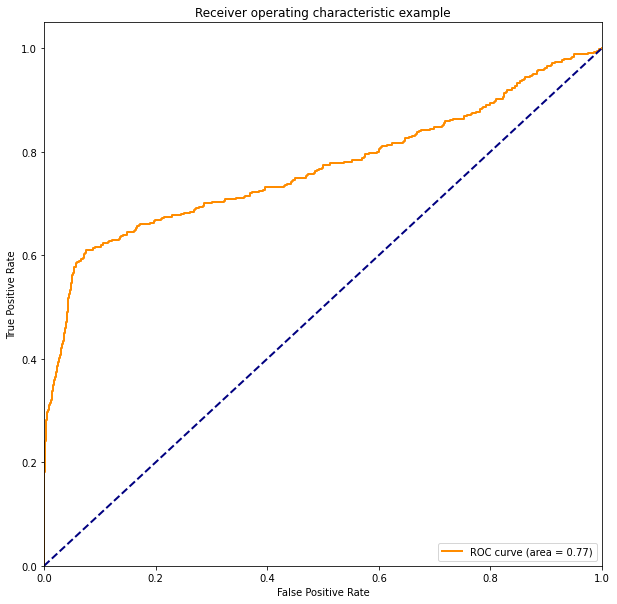

<Figure size 3600x2400 with 0 Axes>

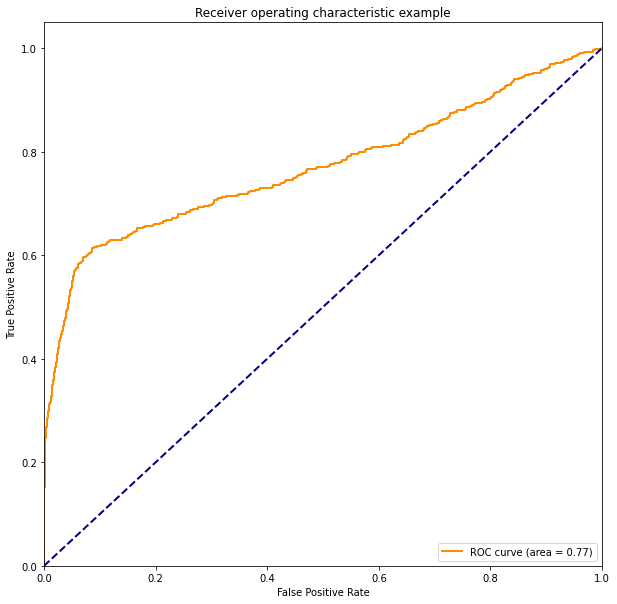

In [15]:
from sklearn import svm

for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    clf_svm = svm.SVC()
    clf_svm.fit(X_train, y_train)
    svm_prob = clf_svm.fit(X_train, y_train).decision_function(X_test)
    svm_pred = clf_svm.predict(X_test)
    print(k)
    print(accuracy_score(y_test, svm_pred))
    print(precision_recall_fscore_support(y_test, svm_pred, average=None))
    print(roc_auc_score(y_test, svm_prob))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, svm_prob) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [229]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
svm_prob = clf_svm.fit(X_train, y_train).decision_function(X_test)
svm_pred = clf_svm.predict(X_test)

In [230]:
cf_svm = confusion_matrix(y_test, svm_pred)
print(cf_svm)
print(accuracy_score(y_test, svm_pred))
print(precision_recall_fscore_support(y_test, svm_pred, average=None))

[[7808    2]
 [ 201   29]]
0.9747512437810946
(array([0.97490323, 0.93548387]), array([0.99974392, 0.12608696]), array([0.98716733, 0.22222222]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

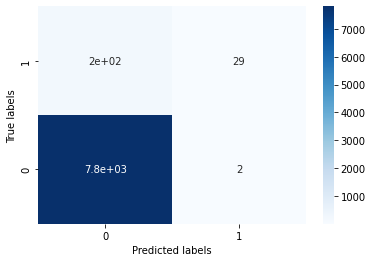

In [231]:
sns.heatmap(cf_svm, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.7974258197405779


<Figure size 3600x2400 with 0 Axes>

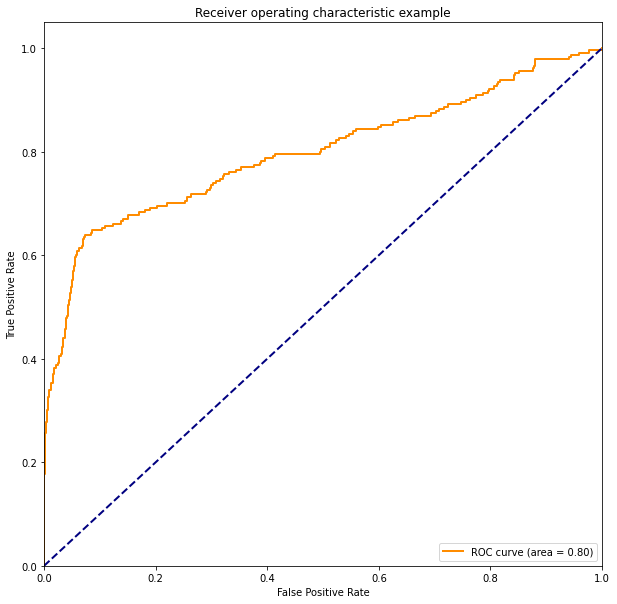

In [233]:
print(roc_auc_score(y_test, svm_prob))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, svm_prob) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## Decision Tree

In [172]:
param = [{'criterion':['gini','entropy'], 'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}]
df_gc = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5, scoring = 'roc_auc', n_jobs=-1)
df_gc.fit(X_train,y_train)
print(df_gc.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 10}


0
0.9778606965174129
(array([0.98248488, 0.625     ]), array([0.99502297, 0.31862745]), array([0.98871418, 0.42207792]), array([15672,   408]))
0.7782196642694853
1
0.9791666666666666
(array([0.98386283, 0.63425926]), array([0.99496398, 0.34860051]), array([0.98938227, 0.4499179 ]), array([15687,   393]))
0.781163184179831
2
0.9766776540829654
(array([0.98193304, 0.64257028]), array([0.99430691, 0.35874439]), array([0.98808124, 0.46043165]), array([15633,   446]))
0.7830786691025854
3
0.9776105479196467
(array([0.98307119, 0.62903226]), array([0.99412328, 0.36792453]), array([0.98856635, 0.46428571]), array([15655,   424]))
0.7900181086276614
4
0.9761801107034019
(array([0.98125592, 0.63247863]), array([0.99449917, 0.33258427]), array([0.98783316, 0.4359352 ]), array([15634,   445]))
0.781669237171075


<Figure size 3600x2400 with 0 Axes>

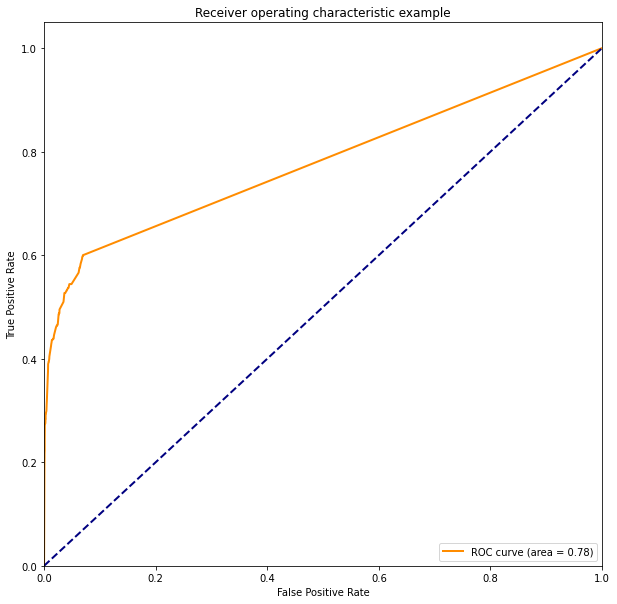

<Figure size 3600x2400 with 0 Axes>

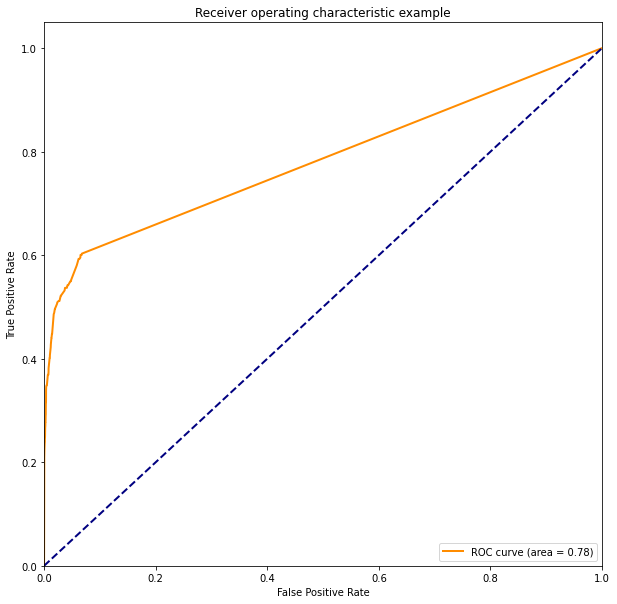

<Figure size 3600x2400 with 0 Axes>

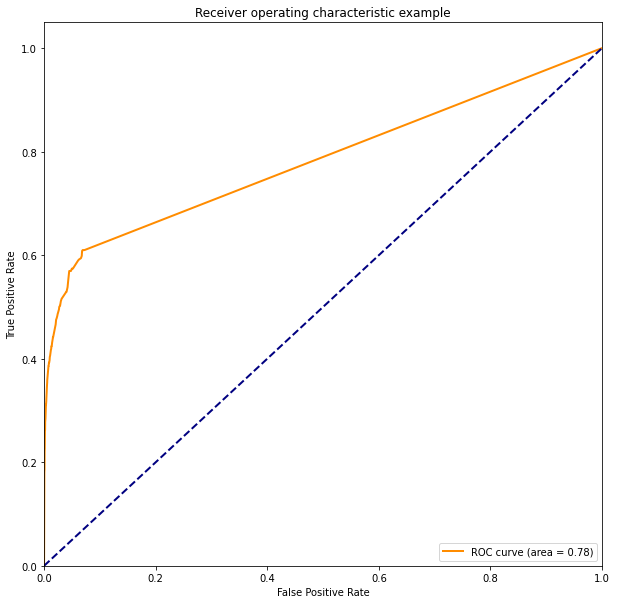

<Figure size 3600x2400 with 0 Axes>

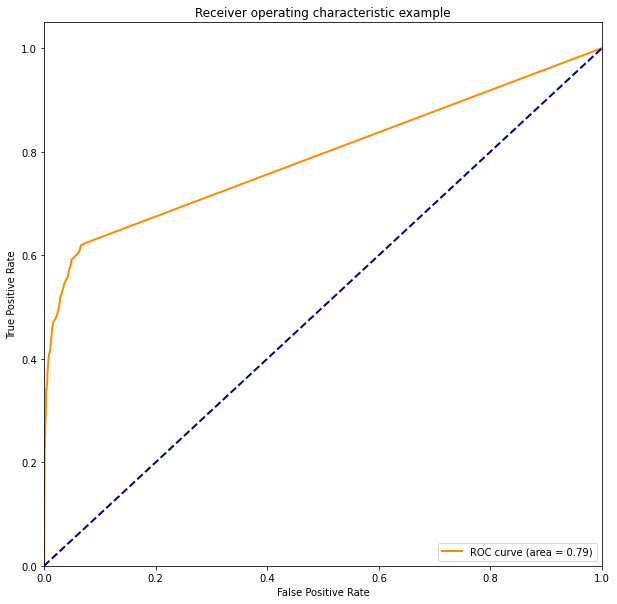

<Figure size 3600x2400 with 0 Axes>

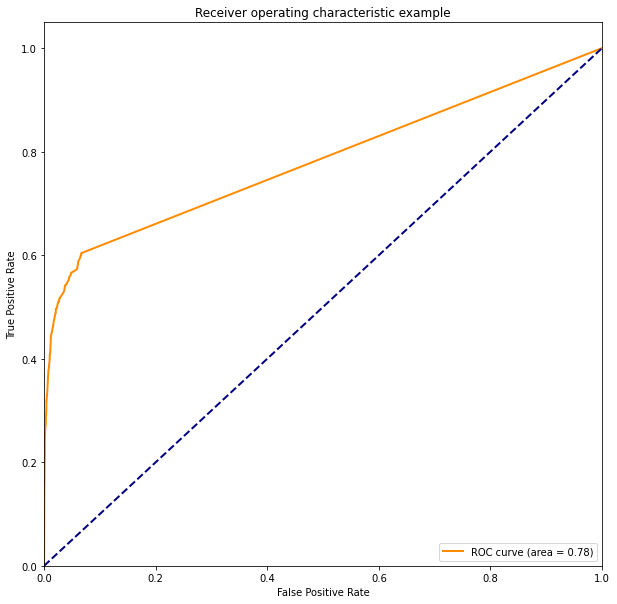

In [17]:
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    dt = DecisionTreeClassifier(max_depth =None, criterion = 'entropy', min_samples_leaf = 10)
    dt.fit(X_train, y_train)
    dt_prob = dt.predict_proba(X_test)
    dt_pred = dt.predict(X_test)
    print(k)
    print(accuracy_score(y_test, dt_pred))
    print(precision_recall_fscore_support(y_test, dt_pred, average=None))
    print(roc_auc_score(y_test, dt_prob[:,1]))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, dt_prob[:,1]) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [173]:
dt = DecisionTreeClassifier(max_depth =None, criterion = 'entropy', min_samples_leaf = 10)
dt.fit(X_train, y_train)
dt_prob = dt.predict_proba(X_test)
dt_pred = dt.predict(X_test)

In [174]:
cf_dt = confusion_matrix(y_test, dt_pred)
print(cf_dt)
print(accuracy_score(y_test, dt_pred))
print(precision_recall_fscore_support(y_test, dt_pred, average=None))

[[7748   62]
 [ 153   77]]
0.9732587064676617
(array([0.98063536, 0.55395683]), array([0.99206146, 0.33478261]), array([0.98631532, 0.41734417]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

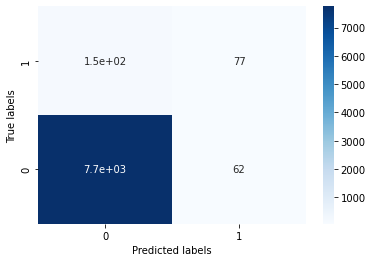

In [175]:
sns.heatmap(cf_dt, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.7898627734788176


<Figure size 3600x2400 with 0 Axes>

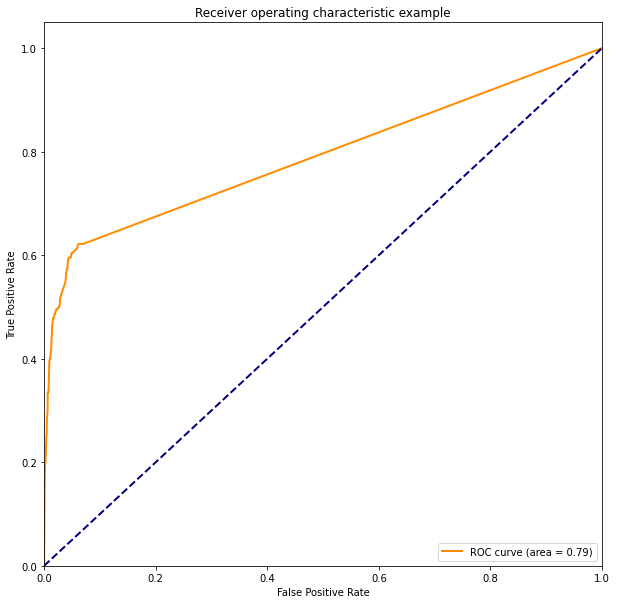

In [176]:
print(roc_auc_score(y_test, dt_prob[:,1]))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, dt_prob[:,1]) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## Random Forest

In [201]:
param_test1= {'n_estimators':range(10,201,10)}
rf_gv1= GridSearchCV(estimator = RandomForestClassifier(max_depth=None, max_features='auto', random_state=42),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
rf_gv1.fit(X_train,y_train)
rf_gv1.best_params_, rf_gv1.best_score_

({'n_estimators': 170}, 0.8936814769863689)

0
0.9826492537313433
(array([0.9832967 , 0.91612903]), array([0.9991705 , 0.34803922]), array([0.99117005, 0.5044405 ]), array([15672,   408]))
0.8911644752975207
1
0.983457711442786
(array([0.98381126, 0.94405594]), array([0.99949002, 0.34351145]), array([0.99158867, 0.50373134]), array([15687,   393]))
0.8802348616567323
2
0.9812799303439269
(array([0.98165368, 0.94478528]), array([0.99942429, 0.34529148]), array([0.99045929, 0.50574713]), array([15633,   446]))
0.9063325138067426
3
0.9821506312581628
(array([0.98278462, 0.9202454 ]), array([0.99916959, 0.35377358]), array([0.99090938, 0.51107325]), array([15655,   424]))
0.9023804860705182
4
0.9802226506623546
(array([0.9804266 , 0.95683453]), array([0.99961622, 0.2988764 ]), array([0.98992842, 0.45547945]), array([15634,   445]))
0.888055060060686


<Figure size 3600x2400 with 0 Axes>

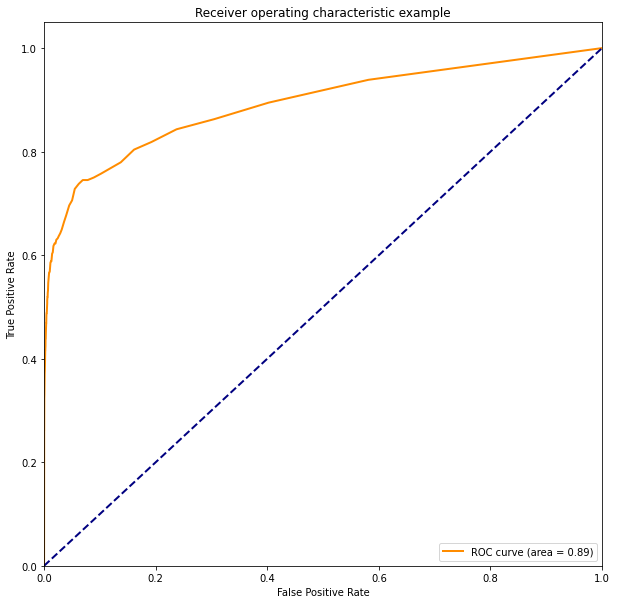

<Figure size 3600x2400 with 0 Axes>

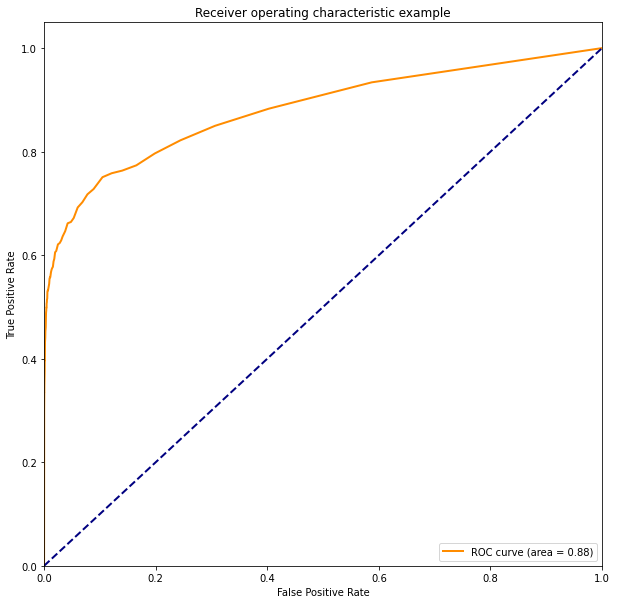

<Figure size 3600x2400 with 0 Axes>

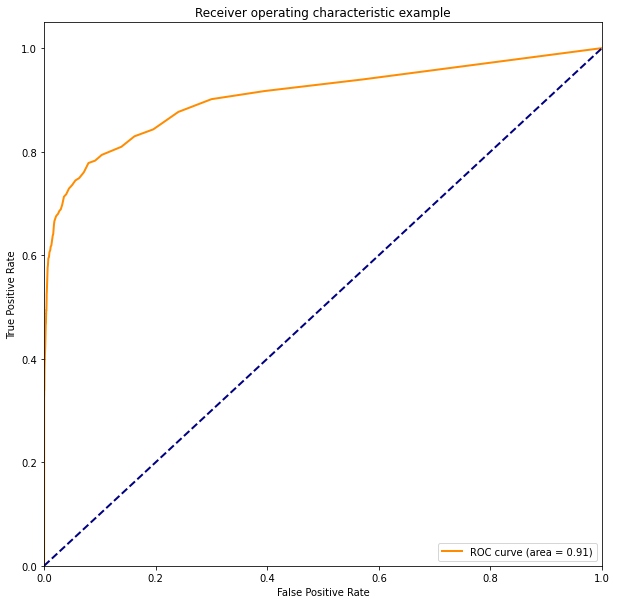

<Figure size 3600x2400 with 0 Axes>

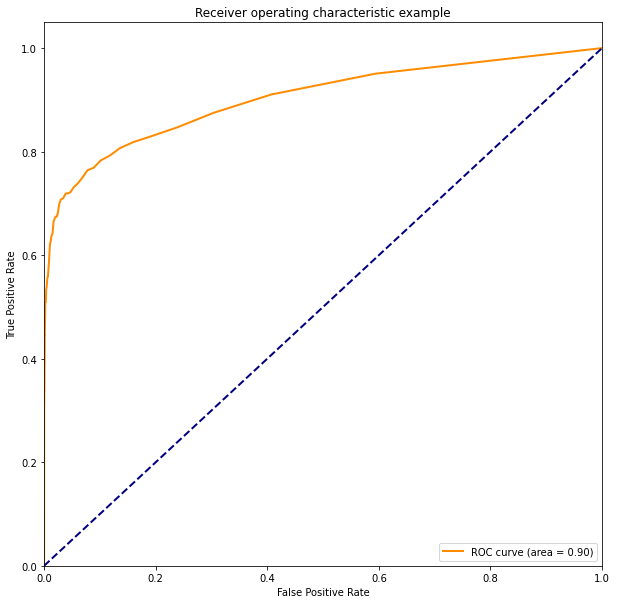

<Figure size 3600x2400 with 0 Axes>

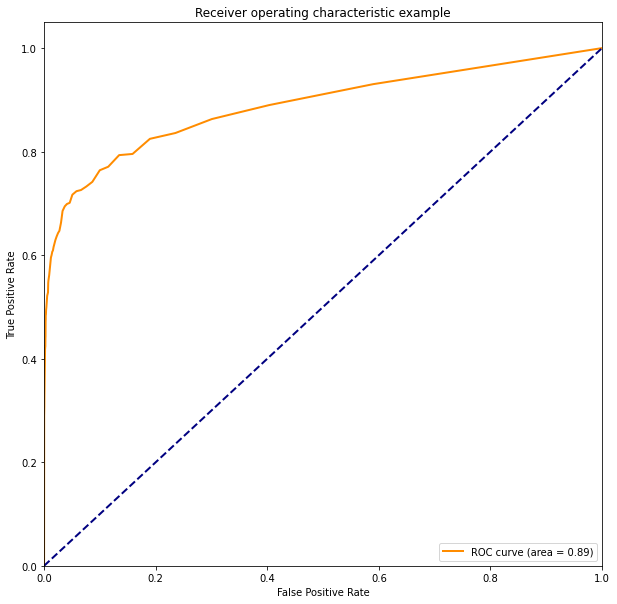

In [18]:
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    rf = RandomForestClassifier(n_estimators= 170, random_state=42)
    rf.fit(X_train, y_train)
    rf_prob = rf.predict_proba(X_test)
    rf_pred = rf.predict(X_test)
    print(k)
    print(accuracy_score(y_test, rf_pred))
    print(precision_recall_fscore_support(y_test, rf_pred, average=None))
    print(roc_auc_score(y_test, rf_prob[:,1]))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, rf_prob[:,1]) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [202]:
rf = RandomForestClassifier(n_estimators= 170, random_state=42)
rf.fit(X_train, y_train)
rf_prob = rf.predict_proba(X_test)
rf_pred = rf.predict(X_test)

In [203]:
cf_rf = confusion_matrix(y_test, rf_pred)
print(cf_rf)
print(roc_auc_score(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))
print(precision_recall_fscore_support(y_test, rf_pred, average=None))

[[7804    6]
 [ 154   76]]
0.6648332683850136
0.9800995024875622
(array([0.9806484 , 0.92682927]), array([0.99923175, 0.33043478]), array([0.98985287, 0.48717949]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

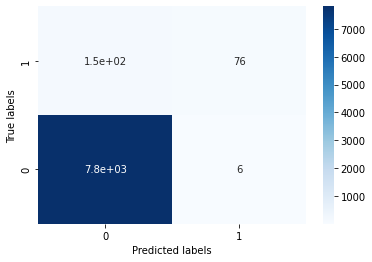

In [204]:
sns.heatmap(cf_rf, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.902091243110839


<Figure size 3600x2400 with 0 Axes>

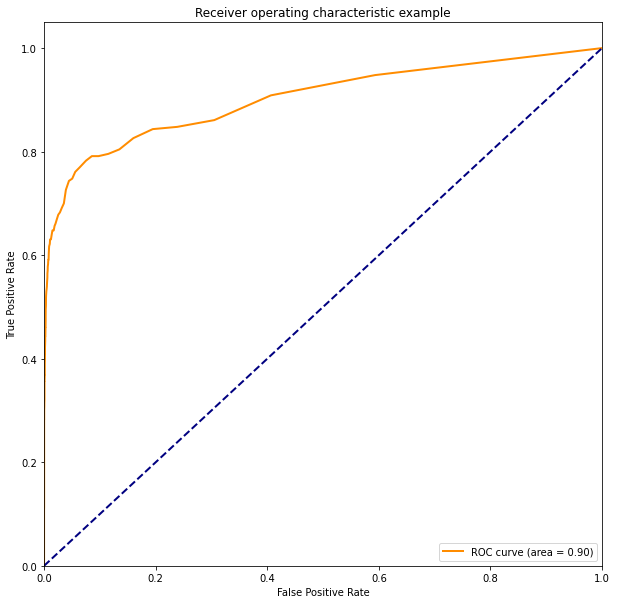

In [205]:
print(roc_auc_score(y_test, rf_prob[:,1]))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, rf_prob[:,1]) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## GBDT

In [228]:
from sklearn.ensemble import GradientBoostingClassifier
param_test1= {'n_estimators':range(500,1001,100)}
dtc_gv1= GridSearchCV(estimator = GradientBoostingClassifier(loss='deviance', learning_rate=0.01,
                 subsample=1.0, random_state = 42),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
dtc_gv1.fit(X_train,y_train)
dtc_gv1.best_params_, dtc_gv1.best_score_

({'n_estimators': 1000}, 0.8672956119798559)

0
0.9720771144278607
(array([0.98620249, 0.45176471]), array([0.98513272, 0.47058824]), array([0.98566732, 0.46098439]), array([15672,   408]))
0.7306362070734367
1
0.9754975124378109
(array([0.98644952, 0.49861496]), array([0.98846178, 0.45801527]), array([0.98745463, 0.47745358]), array([15687,   393]))
0.7448821093169479
2
0.9705205547608682
(array([0.98552303, 0.47008547]), array([0.98413612, 0.49327354]), array([0.98482909, 0.48140044]), array([15633,   446]))
0.750149663282713
3
0.9733814291933578
(array([0.98670332, 0.49541284]), array([0.98594698, 0.50943396]), array([0.986325  , 0.50232558]), array([15655,   424]))
0.7652902653320719
4
0.9718266061322222
(array([0.9854192 , 0.49095023]), array([0.98560829, 0.48764045]), array([0.98551373, 0.48928974]), array([15634,   445]))
0.7351613380805017


<Figure size 3600x2400 with 0 Axes>

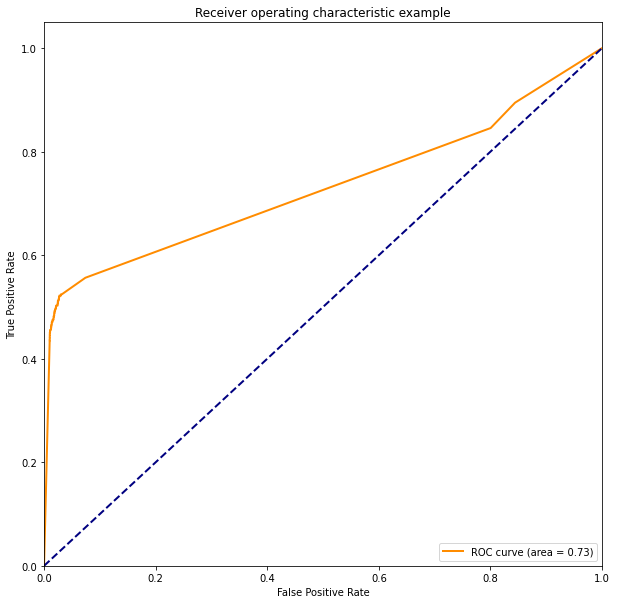

<Figure size 3600x2400 with 0 Axes>

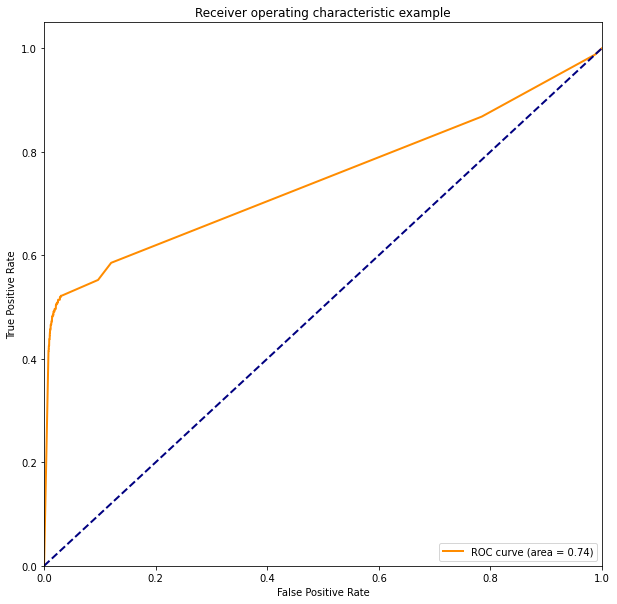

<Figure size 3600x2400 with 0 Axes>

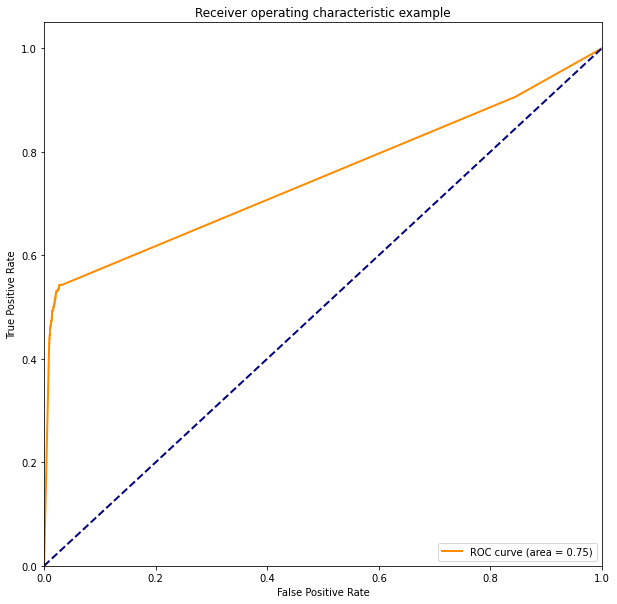

<Figure size 3600x2400 with 0 Axes>

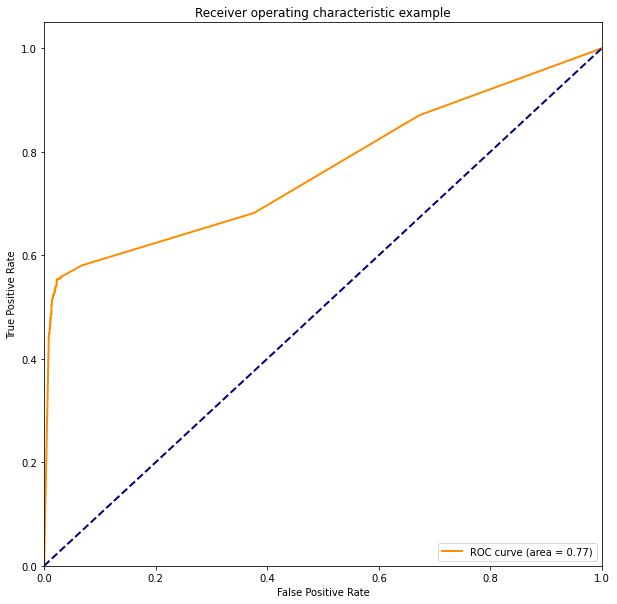

<Figure size 3600x2400 with 0 Axes>

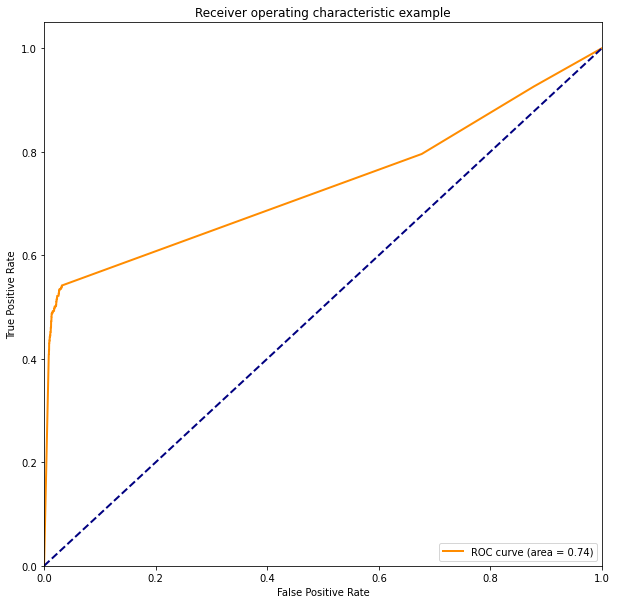

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    dtc = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=1000,
                 max_depth= None, init=None, random_state=42, subsample = 1,
                 max_features=None, verbose=0,
                 max_leaf_nodes=None, warm_start=False)
    dtc.fit(X_train,y_train)
    dtc_prob = dtc.predict_proba(X_test)
    dtc_pred = dtc.predict(X_test)
    print(k)
    print(accuracy_score(y_test, dtc_pred))
    print(precision_recall_fscore_support(y_test, dtc_pred, average=None))
    print(roc_auc_score(y_test, dtc_prob[:,1]))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, dtc_prob[:,1]) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc


    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
dtc = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=1000,
                 max_depth= None, init=None, random_state=42, subsample = 1,
                 max_features=None, verbose=0,
                 max_leaf_nodes=None, warm_start=False)
dtc.fit(X_train,y_train)
dtc_prob = dtc.predict_proba(X_test)
dtc_pred = dtc.predict(X_test)

In [251]:
cf_dtc = confusion_matrix(y_test, dtc_pred)
print(cf_dtc)
print(accuracy_score(y_test, dtc_pred))
print(precision_recall_fscore_support(y_test, dtc_pred, average=None))

[[7706  104]
 [ 117  113]]
0.9725124378109453
(array([0.9850441 , 0.52073733]), array([0.98668374, 0.49130435]), array([0.98586324, 0.50559284]), array([7810,  230]))


Text(33.0, 0.5, 'True labels')

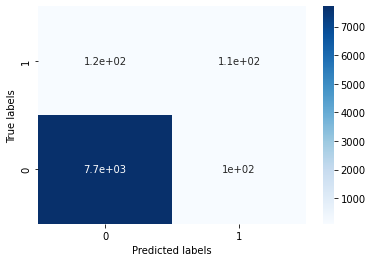

In [252]:
sns.heatmap(cf_dtc, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

0.7777690252185047


<Figure size 3600x2400 with 0 Axes>

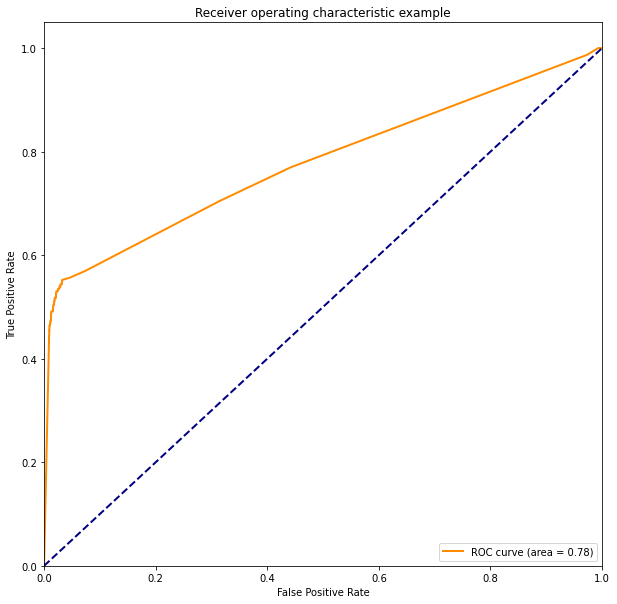

In [253]:
print(roc_auc_score(y_test, dtc_prob[:,1]))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, dtc_prob[:,1]) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)

## DNN

In [26]:
import torch
import torchmetrics
import torch.nn as nn
def build_model():
    mlp = nn.Sequential(
        nn.Linear(77,9), 
        #nn.ReLU(),  
       # nn.Linear(32,10),
        nn.Sigmoid(), 
        nn.Linear(9,2),
        nn.Softmax(dim=1)
    )
    return mlp

def dnn_train_test(X_train, y_train, X_test, y_test):
    model = build_model()
    X_t = torch.from_numpy(X_train.values)
    y_t = torch.from_numpy(y_train.values)
    X_t = X_t.float()
    y_t = y_t.long()
    X_test_ten = torch.from_numpy(X_test.values)
    X_test_ten = X_test_ten.float()
    y_test_ten = torch.from_numpy(y_test.values)
    y_test_ten = y_test_ten.long()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
    loss_func = torch.nn.CrossEntropyLoss()

    num_epoch = 30000
    for epoch in range(num_epoch):
        y_pred = model(X_t)
        loss = loss_func(y_pred, y_t) # 计算损失
        optimizer.zero_grad()  # 清除梯度
        loss.backward()  # 计算梯度，误差回传
        optimizer.step()  # 根据计算的梯度，更新网络中的参数
        if epoch % 5000 == 0:
            print('epoch: {}, loss: {}'.format(epoch, loss.data.item()))
    
    nn_pred = model(X_test_ten)
    print("Accuracy")
    print(torchmetrics.functional.classification.accuracy(nn_pred, y_test_ten, average = 'micro'))
    print("Precision")
    print(torchmetrics.functional.classification.precision(nn_pred, y_test_ten, num_classes = 2, average = 'none'))
    print("Recall")
    print(torchmetrics.functional.classification.recall(nn_pred, y_test_ten, num_classes = 2, average = 'none'))
    print("F1_score")
    print(torchmetrics.functional.classification.f1_score(nn_pred, y_test_ten, num_classes = 2, average = 'none'))
    print(torchmetrics.functional.classification.auroc(nn_pred[:,1], y_test_ten))
    # Compute ROC curve and ROC area for each class
    fpr,tpr,threshold = roc_curve(y_test, nn_pred[:,1].detach().numpy()) # calculate false positive and true positive
    roc_auc = auc(fpr,tpr) # auc
    plt.figure(dpi=600)
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig('dt_600.png', dpi=600)
    plt.savefig('dt_150.png', dpi=150)

0
epoch: 0, loss: 0.7219012379646301
epoch: 5000, loss: 0.35104241967201233
epoch: 10000, loss: 0.3402167856693268
epoch: 15000, loss: 0.33851054310798645
epoch: 20000, loss: 0.33714646100997925
epoch: 25000, loss: 0.3361012935638428
Accuracy
tensor(0.9771)
Precision
tensor([0.9780, 0.7778])
Recall
tensor([0.9990, 0.1373])
F1_score
tensor([0.9884, 0.2333])
tensor(0.7454)


/Users/Sanddy/opt/miniconda3/envs/5004/lib/python3.9/site-packages/torchmetrics/functional/classification/precision_recall.py:259: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /tmp/pip-req-build-x1rp5px8/torch/csrc/utils/python_arg_parser.cpp:882.)
  meaningless_indeces = ((tp | fn | fp) == 0).nonzero().cpu()


1
epoch: 0, loss: 0.7598654627799988
epoch: 5000, loss: 0.3533821403980255
epoch: 10000, loss: 0.340934693813324
epoch: 15000, loss: 0.3390573263168335
epoch: 20000, loss: 0.3374408483505249
epoch: 25000, loss: 0.33623987436294556
Accuracy
tensor(0.9784)
Precision
tensor([0.9788, 0.8833])
Recall
tensor([0.9996, 0.1349])
F1_score
tensor([0.9891, 0.2340])
tensor(0.7423)
2
epoch: 0, loss: 0.5988836288452148
epoch: 5000, loss: 0.3472294211387634
epoch: 10000, loss: 0.33969178795814514
epoch: 15000, loss: 0.33816230297088623
epoch: 20000, loss: 0.33671632409095764
epoch: 25000, loss: 0.33571580052375793
Accuracy
tensor(0.9747)
Precision
tensor([0.9753, 0.8197])
Recall
tensor([0.9993, 0.1121])
F1_score
tensor([0.9871, 0.1972])
tensor(0.7426)
3
epoch: 0, loss: 0.9167572259902954
epoch: 5000, loss: 0.35845720767974854
epoch: 10000, loss: 0.34088143706321716
epoch: 15000, loss: 0.3389184772968292
epoch: 20000, loss: 0.33689677715301514
epoch: 25000, loss: 0.33575552701950073
Accuracy
tensor(0.9

<Figure size 3600x2400 with 0 Axes>

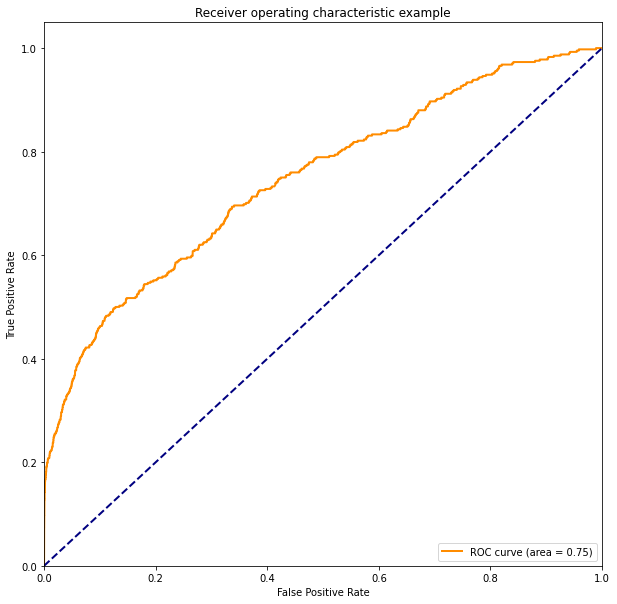

<Figure size 3600x2400 with 0 Axes>

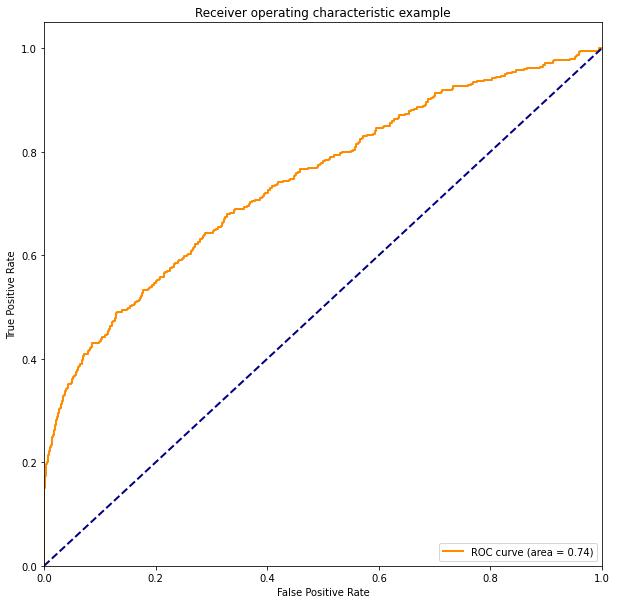

<Figure size 3600x2400 with 0 Axes>

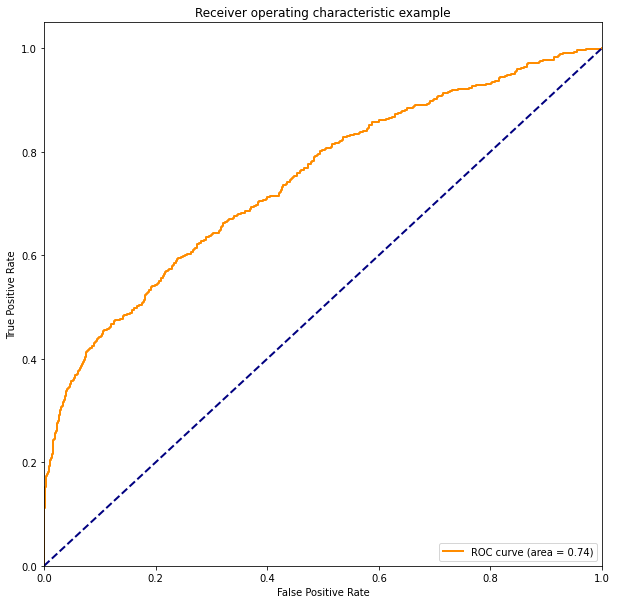

<Figure size 3600x2400 with 0 Axes>

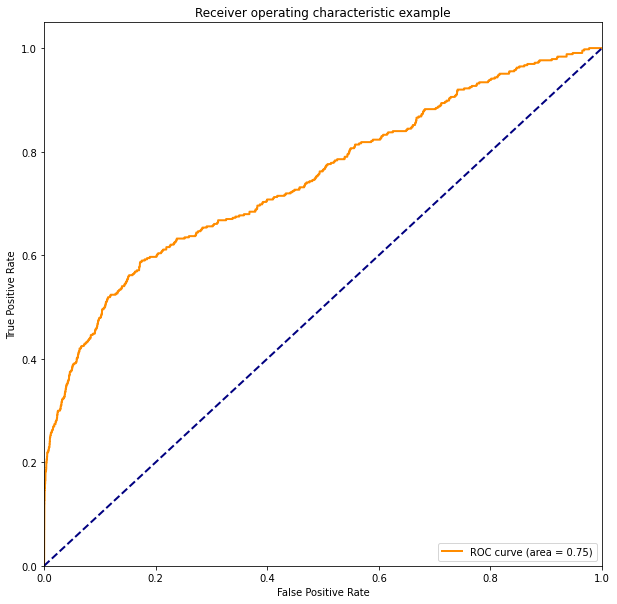

<Figure size 3600x2400 with 0 Axes>

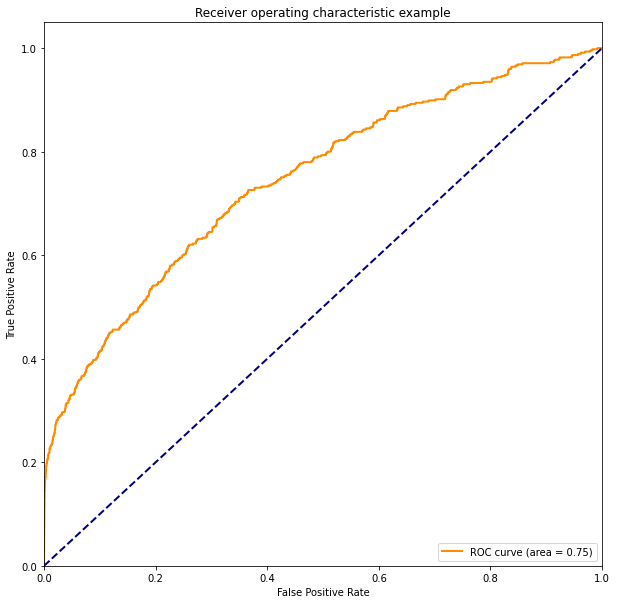

In [27]:
for k, (train,test) in enumerate(kf.split(X,y)):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    print(k)
    dnn_train_test(X_train, y_train, X_test, y_test)

tensor(0.9741)
tensor([0.9868, 0.2180])
tensor([[7803,    7],
        [ 201,   29]])


Text(33.0, 0.5, 'True labels')

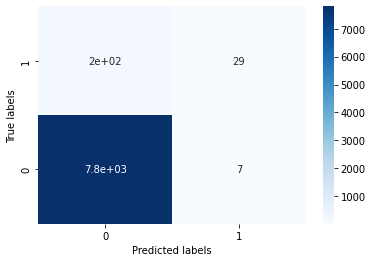

In [189]:
import torchmetrics
from torchmetrics.functional.classification import f1_score
nn_pred = model(X_test_ten)
print(torchmetrics.functional.classification.accuracy(nn_pred, y_test_ten, average = 'micro'))
print(f1_score(nn_pred, y_test_ten, num_classes = 2, average = 'none'))
cf = torchmetrics.ConfusionMatrix(num_classes = 2)
cf_nn = cf(nn_pred, y_test_ten)
print(cf_nn)
sns.heatmap(cf_nn, annot=True, cmap='Blues')
plt.ylim(0, 2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

tensor(0.7573)


<Figure size 3600x2400 with 0 Axes>

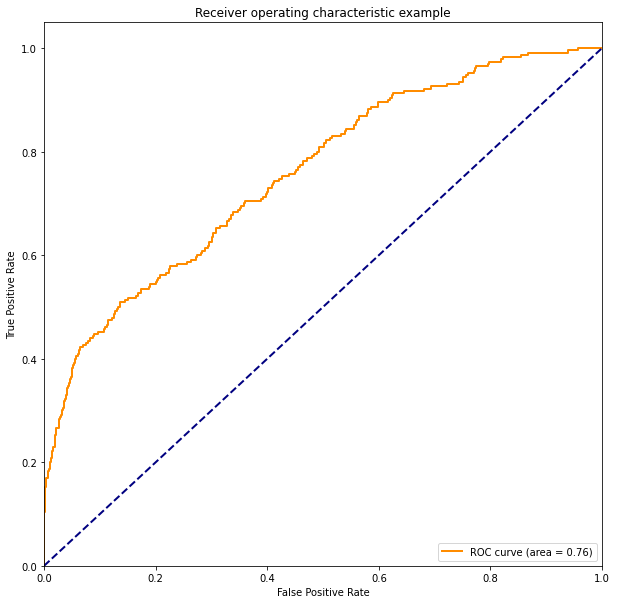

In [190]:
print(torchmetrics.functional.classification.auroc(nn_pred[:,1], y_test_ten))
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, nn_pred[:,1].detach().numpy()) # calculate false positive and true positive
roc_auc = auc(fpr,tpr) # auc


plt.figure(dpi=600)
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.savefig('dt_600.png', dpi=600)
plt.savefig('dt_150.png', dpi=150)